## **Segmentation of Credit Card Users in Python**

#### **Unsupervised Learning Project**

#### **Contents**

1.Introduction

2.Goal of The Project

3.General View of Data

4.Data Cleaning

5.Clustering Algorithms

6.Comparison of Results

7.Summary

#### **1. Introduction**

Unlike Supervised Learning, Unsupervised learning has only independent variables and no corresponding target variable. Shortly, the data is unlabeled.
The aim of unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

#### **2. Goal of the Project**

We are going to aim to cluster a data set that is about behaviour of the customers having credit card.

**Our research question is "How many clusters can we distinguish the customers according to theirs transactions or behaviours ?"**



#### **3. General View of Data**

The data set has 8950 transactions or informations about account that belong to customers.

**Features**

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCE FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONE OFF PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS PURCHASES : Amount of purchase done in installment

CASH ADVANCE : Cash in advance given by the user

PURCHASES FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONE OFF PURCHASES FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASES INSTALLMENTS FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASH ADVANCE FREQUENCY : How frequently the cash in advance being paid

CASH ADVANCE TRX : Number of Transactions made with "Cash in Advanced"

PURCHASES TRX : Number of purchase transactions made

CREDIT LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM PAYMENTS : Minimum amount of payments made by user

PRC FULL PAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn import metrics

from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
df=pd.read_csv("gdrive/My Drive/Colab Notebooks/CC GENERAL.csv")
df.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
print('This data set has {} rows and {} columns.\n'.format(df.shape[0],df.shape[1]))
df.info()

This data set has 8950 rows and 18 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX        

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### **4. Data Cleaning**

In [5]:
# Lets check the missing values and fill them with appropriate method.
def null_values(df):
    nv=pd.DataFrame(df.isnull().sum()).rename(columns={0:'Missing_Records'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)
null_values(df)

,Missing_Records
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1


In [6]:
# We can fill the null values with mean.
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df.MINIMUM_PAYMENTS.mean())
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df.CREDIT_LIMIT.mean())
null_values(df).sum()

Missing_Records    0
dtype: int64

In [0]:
# Actually we can drop the "CUST_ID" columns because we will not use it.
df=df.drop('CUST_ID',axis=1)

In [8]:
# There are lots of outliers in columns but we will not apply winsorize or another methods to them.Because we may have information loss.
# They may represent another clusters.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df[df.columns ]< (Q1 - 1.5 * IQR)) | (df[df.columns] > (Q3 + 1.5 * IQR))).sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     774
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

In [0]:
# StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale.
scaler=StandardScaler()
df_scl=scaler.fit_transform(df)

In [0]:
# Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.
# It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in unsupervised learning.
norm=normalize(df_scl) 

In [0]:
# We can apply both (StandartScaler and Normalize) on our data before clustering. 
df_norm=pd.DataFrame(norm)

#### **5. Clustering Algorithms**

**5.1 K-Means**

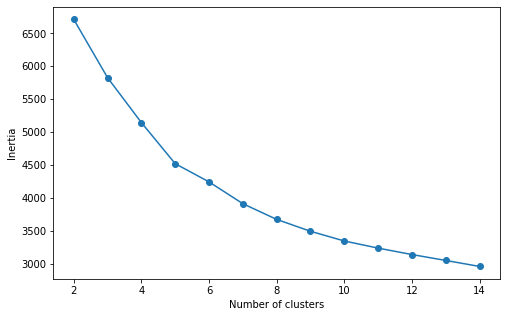

In [12]:
scores = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(df_norm)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

In [13]:
for i in range(5,11):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_norm,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 5 clusters k-means : 0.229 
Silhouette score for 6 clusters k-means : 0.222 
Silhouette score for 7 clusters k-means : 0.238 
Silhouette score for 8 clusters k-means : 0.239 
Silhouette score for 9 clusters k-means : 0.219 
Silhouette score for 10 clusters k-means : 0.217 


The values of silhouette score are close to each other in range 6 to 8. In the circumstances, Let's look at the another metric. The metric is Davies Bouldin that is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. The minimum score is zero, with lower values indicating better clustering.

In [14]:
for i in [6,7,8]:
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,kmeans_labels).round(3)))

Davies Bouldin Score:1.465
Davies Bouldin Score:1.354
Davies Bouldin Score:1.415


Unlike Davies Bouldin, we want to be high of Silhouette score. Hence, when we evaluate both Elbow technique and Silhouette score, optimal cluster numbers are 7 according to K-Means Algorithm. So I have determined 7 as the k values of the K-means model.

In [0]:
kmeans_labels=KMeans(n_clusters=7,random_state=123).fit_predict(df_norm)

Now, Let's visualize "CC GENERAL" dataset in three-dimensional space. Hence, we should apply PCA before.

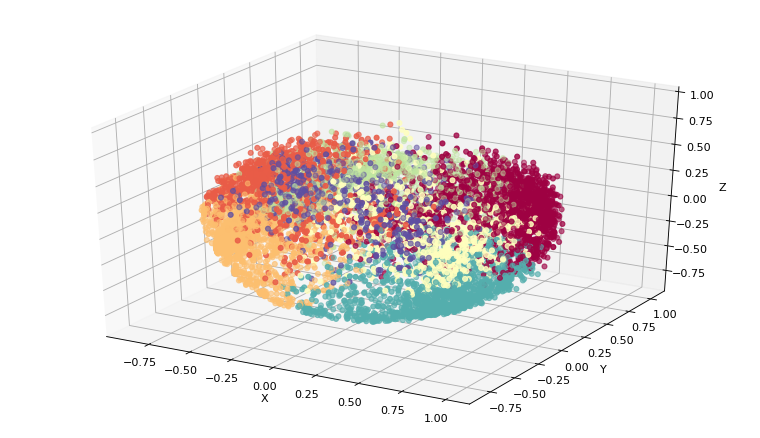

In [16]:
pca = PCA(n_components=3).fit_transform(df_norm)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

**5.2 MiniBatch K-Means**

In [17]:
for i in range(5,11):
    minikm_labels = MiniBatchKMeans(n_clusters=i,init='random',batch_size=100000).fit_predict(df_norm)
    print("Silhouette score for {} clusters MiniBatch k-means : {}".format(i,metrics.silhouette_score(df_norm, minikm_labels, metric='euclidean').round(3)))

Silhouette score for 5 clusters MiniBatch k-means : 0.201
Silhouette score for 6 clusters MiniBatch k-means : 0.173
Silhouette score for 7 clusters MiniBatch k-means : 0.241
Silhouette score for 8 clusters MiniBatch k-means : 0.23
Silhouette score for 9 clusters MiniBatch k-means : 0.199
Silhouette score for 10 clusters MiniBatch k-means : 0.192


In [18]:
for i in [6,7,8,10]:
    minikm_labels = MiniBatchKMeans(n_clusters=i,init='random',batch_size=100000).fit_predict(df_norm)
    print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,minikm_labels).round(3)))

Davies Bouldin Score:1.595
Davies Bouldin Score:1.647
Davies Bouldin Score:1.656
Davies Bouldin Score:1.6


According to these metrics, I have determined 6 as the cluster number. Let's visualize.

In [0]:
minikm_labels = MiniBatchKMeans(n_clusters=6,init='random',batch_size=100000).fit_predict(df_norm)

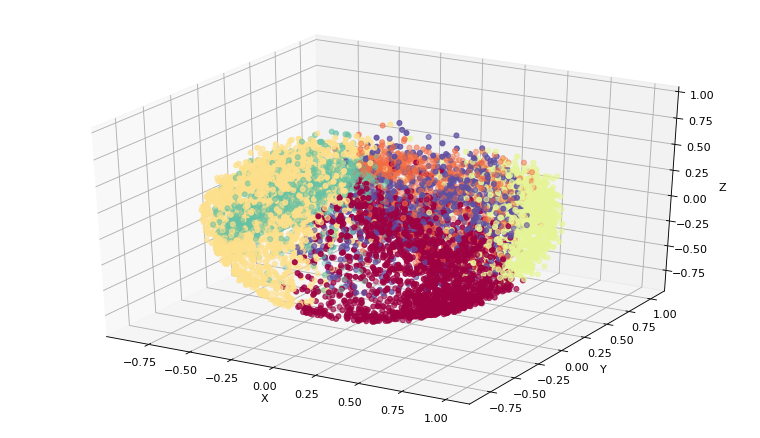

In [20]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=minikm_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

**5.3 Hierarchical Clustering**

Hierarchical clustering is a clustering technique that aims to create a tree like clustering hierarchy within the data. On this model, to determine the n_clusters, we can able to use a dendogram.

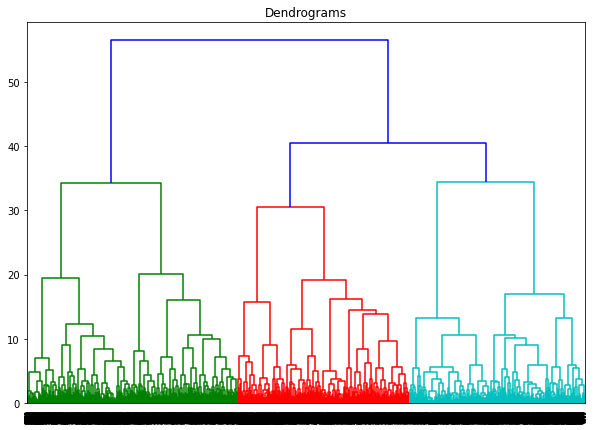

In [21]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_norm, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 38 and cut the dendrogram.

There are three clusters according to the dendogram.

In [22]:
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcp=hcluster.fit_predict(df_norm)
print('Silhouette Score for Hieararchial Clustering:'+str(metrics.silhouette_score(df_norm,hcp,metric='euclidean')))
print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,hcp)))

Silhouette Score for Hieararchial Clustering:0.16269232126810304
Davies Bouldin Score:2.0178566980982713


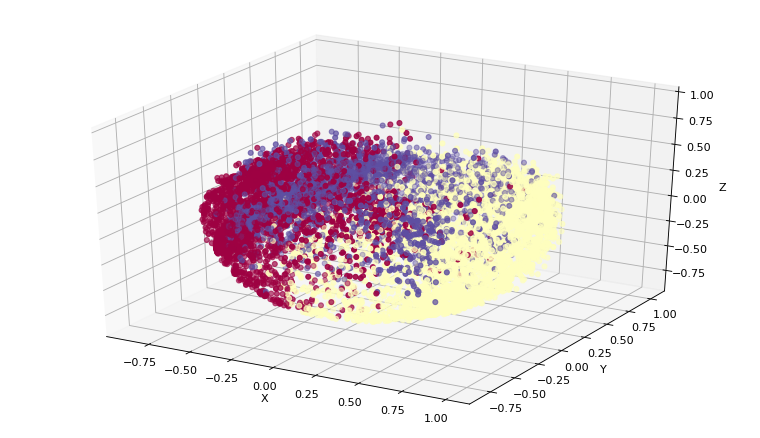

In [23]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=hcp,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

**5.4 DBSCAN Algorithm**

DBSCAN, as the name implies, is a density-based clustering algorithm. Density refers to the proximity of data points in a cluster and it is good for data which contains clusters of a similar density.

Firstly, we should choose two parameters, a positive number epsilon and a natural number minPoints. Than we built the model.

In [0]:
results=pd.DataFrame(columns=['Eps','Min_Samples','Number of Cluster','Silhouette Score'])
for i in range(1,6):
  for j in range(1,6):
      dbscan_cluster = DBSCAN(eps=i*0.5, min_samples=j)
      clusters=dbscan_cluster.fit_predict(df_norm)
      if len(np.unique(clusters))>=2:
          results=results.append({'Eps':i*0.5,
                        'Min_Samples':j,
                        'Number of Cluster':len(np.unique(clusters)),
                        'Silhouette Score':metrics.silhouette_score(df_norm,clusters),
                        'Davies Bouldin Score':metrics.davies_bouldin_score(df_norm,clusters)}, ignore_index=True)

In [25]:
results.sort_values('Silhouette Score',ascending=False)

,Eps,Min_Samples,Number of Cluster,Silhouette Score,Davies Bouldin Score
4,0.5,5.0,2.0,0.031473,6.317956
3,0.5,4.0,2.0,0.030867,6.338444
2,0.5,3.0,2.0,0.030261,6.299982
1,0.5,2.0,13.0,-0.251242,2.070248
0,0.5,1.0,180.0,-0.440189,0.985561


It would seem that DBSCAN is not appropriate method for this dataset.  Nevertheless, let's visualize.

In [0]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=2)
db_clusters=dbscan_cluster.fit_predict(df_norm)

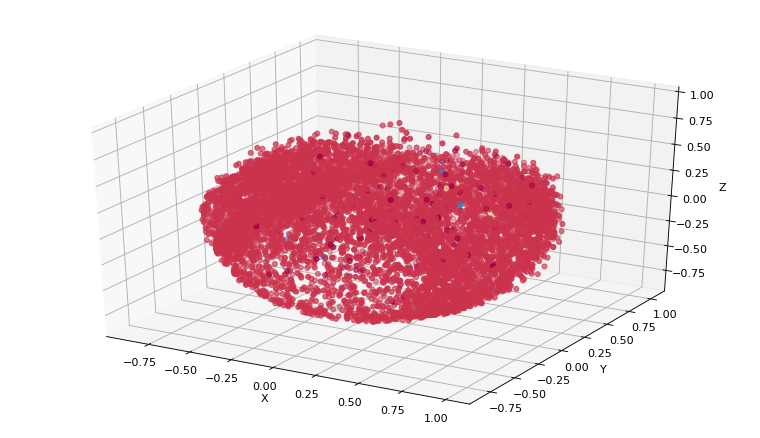

In [27]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=db_clusters,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

****

**5.5 GMM Algorithm**

Gaussian Mixture Models (GMMs) assume there are a number of Gaussian distributions, and each of them represents a cluster. Therefore a Gaussian Mixture Model tends to group together the data points that belong to a single distribution.

Firstly, we should determine the n_clusters. The optimal number of clusters (k) is the value that minimizes the Akaike information criterion (AIC) or the Bayesian information criterion (BIC).


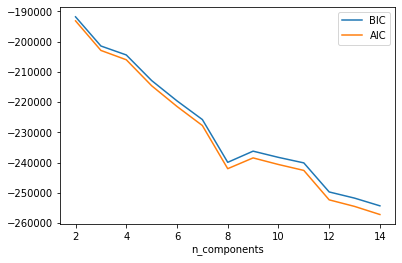

In [28]:
models = [GaussianMixture(n,covariance_type='tied', random_state=123).fit(df_norm) for n in range(2,15)]
plt.plot(range(2,15), [m.bic(df_norm) for m in models], label='BIC')
plt.plot(range(2,15), [m.aic(df_norm) for m in models], label='AIC')
plt.legend()
plt.xlabel('n_components')
plt.show()

In the present case, when the number of clusters increase, the values ​​of AIC and BIC scores decrease. This doesn't give us a suitable solution.

Let's look at the performance metrics according to changing parameters. Also we are going to calculate the Davies Bouldin Score.

In [0]:
parameters=['full','tied','diag','spherical']
n_clusters=np.arange(1,21)
results_=pd.DataFrame(columns=['Covariance Type','Number of Cluster','Silhouette Score','Davies Bouldin Score'])
for i in parameters:
    for j in n_clusters:
        gmm_cluster=GaussianMixture(n_components=j,covariance_type=i,random_state=123)
        clusters=gmm_cluster.fit_predict(df_norm)
        if len(np.unique(clusters))>=2:
          results_=results_.append({"Covariance Type":i,'Number of Cluster':j,"Silhouette Score":metrics.silhouette_score(df_norm,clusters),
                                    'Davies Bouldin Score':metrics.davies_bouldin_score(df_norm,clusters)}
                                   ,ignore_index=True)

In [30]:
display(results_.sort_values(by=["Silhouette Score"], ascending=False)[:5])

,Covariance Type,Number of Cluster,Silhouette Score,Davies Bouldin Score
57,spherical,2,0.225937,1.788465
19,tied,2,0.221204,1.820518
60,spherical,5,0.207281,1.558957
59,spherical,4,0.205910,1.713065
38,diag,2,0.203434,1.861330


We have selected covariance type and number of clusters that are ‘spherical’ and 5 respectively. The parameters have given the Silhouette Score of 0.207.

In [0]:
gmm_cluster=GaussianMixture(n_components=5,covariance_type="spherical",random_state=123)
gmm_cluster.fit(df_norm)
gmm_labels = gmm_cluster.predict(df_norm)

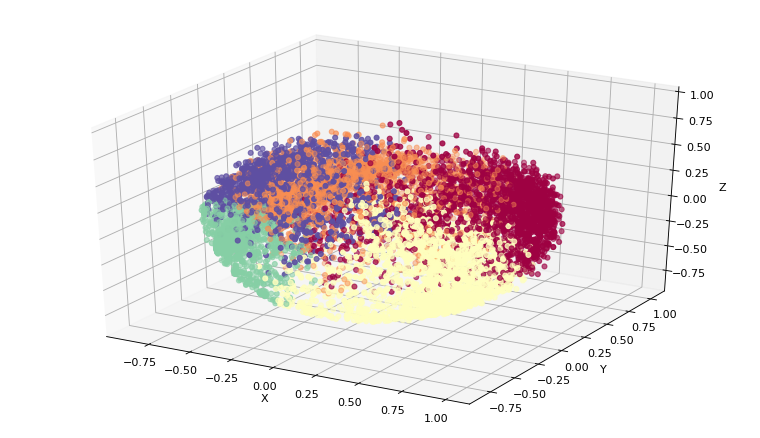

In [32]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=gmm_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

**5.6 MeanShift**

MeanShift algorithm is another powerful clustering algorithm used in unsupervised learning. Unlike K-means clustering, it doesn’t require any assumptions; hence it is a non-parametric algorithm.

MeanShift algorithm basically assigns the datapoints to the clusters iteratively by shifting points towards the highest density of datapoints i.e. cluster centroid.

In [35]:
est_bandwidth = estimate_bandwidth(df_norm, quantile=0.1,n_samples=10000)
mean_shift = MeanShift(bandwidth= est_bandwidth, bin_seeding=True).fit(df_norm)
labels_unique=np.unique(mean_shift.labels_)
n_clusters_=len(labels_unique)
print("Number of estimated clusters : %d" % n_clusters_)

Number of estimated clusters : 3


In [36]:
print('Silhouette Score for MeanShift:'+str(metrics.silhouette_score(df_norm,mean_shift.labels_,metric='euclidean').round(3)))
print('Davies Bouldin Score for MeanShift:'+str(metrics.davies_bouldin_score(df_norm,mean_shift.labels_).round(3)))

Silhouette Score for MeanShift:0.181
Davies Bouldin Score for MeanShift:2.114


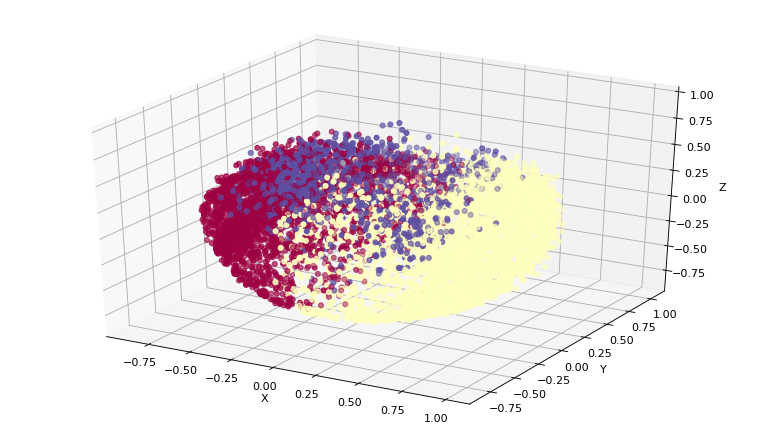

In [37]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=mean_shift.labels_, cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

### **6. Comparison of Results**

In [0]:
algorithms=["K-Means","MiniBatch K-Means","Hierarchical Clustering","DBSCAN","Gaussian Mixture Model","MeanShift"]

# Silhouette Score
ss=[metrics.silhouette_score(df_norm,kmeans_labels),metrics.silhouette_score(df_norm,minikm_labels),metrics.silhouette_score(df_norm,hcp),
   metrics.silhouette_score(df_norm,db_clusters),metrics.silhouette_score(df_norm,gmm_labels),metrics.silhouette_score(df_norm,mean_shift.labels_)]

# Davies Bouldin Score
db=[metrics.davies_bouldin_score(df_norm,kmeans_labels),metrics.davies_bouldin_score(df_norm,minikm_labels),metrics.davies_bouldin_score(df_norm,hcp),
   metrics.davies_bouldin_score(df_norm,db_clusters),metrics.davies_bouldin_score(df_norm,gmm_labels),metrics.davies_bouldin_score(df_norm,mean_shift.labels_)]

In [39]:
comprsn={"Algorithms":algorithms,"Davies Bouldin":db,"Silhouette Score":ss}
compdf=pd.DataFrame(comprsn)
display(compdf.sort_values(by=["Silhouette Score"], ascending=False))

,Algorithms,Davies Bouldin,Silhouette Score
0,K-Means,1.354108,0.237578
4,Gaussian Mixture Model,1.558957,0.207281
5,MeanShift,2.114327,0.180770
1,MiniBatch K-Means,1.775748,0.169568
2,Hierarchical Clustering,2.017857,0.162692
3,DBSCAN,2.070248,-0.251242


Finally, We have tried six algorithm. K-Means has the best Silhouette and Davies Bouldin score. For this reason, K-Means Algorithm is more suitable for customer segmentation. Thus we have 7 customer types. Let’s try to understand behaviours or labels of customers.

In [40]:
df['Clusters']=list(kmeans_labels)
customers=pd.DataFrame(df['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})
customers.T

,2,0,4,5,1,3,6
Number of Customers,1865,1653,1554,1307,1147,771,653


In [41]:
means=pd.DataFrame(df.describe().loc['mean'])
means.T.iloc[:,[0,1,6,8,9,11,12,16]].round(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,TENURE
mean,1564.5,0.9,0.5,0.4,0.1,14.7,4494.4,11.5


In [42]:
df.set_index('Clusters')
grouped=df.groupby(by='Clusters').mean().round(1)
grouped.iloc[:,[0,1,6,8,9,11,12,16]]

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,TENURE
Clusters,,,,,,,,
0,2020.6,1.0,0.9,0.6,0.1,44.6,7003.0,11.9
1,131.0,0.4,0.2,0.2,0.0,4.0,3811.0,11.8
2,1259.7,1.0,0.1,0.0,0.1,2.2,2780.2,11.9
3,99.6,0.9,0.8,0.7,0.0,16.6,4123.0,11.7
4,4044.3,1.0,0.2,0.2,0.4,5.8,6744.0,11.7
5,947.0,1.0,0.9,0.8,0.0,18.4,2906.6,11.9
6,862.4,0.8,0.4,0.3,0.2,5.1,2504.2,7.4


In my opinion, i have choosen some columns that are significant to identify the clusters.


Cluster 0 : The highest purchase frequency which tend to pay in installment, that is higher credit limit and long duration customers.

Cluster 1 : Pretty low balance and purchase frequency. They rarely use credit card and also they have lower credit limit.

Cluster 2 : This group is having the highest amount of customers and lowest usage of cards. Inactive customers, also long duration customers.

Cluster 3 : High tendency of payment installment, higher purchase frequency and their tenure time is above avarage.

Cluster 4 : The highest balance amount but purchase frequency is not that good. Tend to cash in advance, higher credit limit than others. They don’t like spending money.

Cluster 5 : Second highest purchase frequency and also higher tendency payment in installment. They are long duration customers.

Cluster 6 : The least quantity of customer is in this group which are below avarage of purchase frequency and a shortly duration customers.


### **7. Summary**

Firstly, we have started with data preprocessing. Than, we applied clustering algorithms. After comparing these clustering models than, we decided to use K-Means as the model. Than, we divided the data into seven clusters, because seven clusters can be easily used to determine the behaviours of customers. However, each of the clusters have their own characteristics.